<a href="https://colab.research.google.com/github/Aleena24/Computer-Vision/blob/main/lab9_featureDescriptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image Preprocessing

resizing

grayscale

gaussian blur



In [17]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    smooth_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    return smooth_img

# Edge Extraction

The Canny edge detection algorithm is widely used for its effectiveness in detecting a wide range of edges in images while reducing noise and producing continuous, well-connected edges. The algorithm involves several steps, including gradient calculation, non-maximum suppression, and hysteresis thresholding.

100 =  lower threshold = weak edges

200 =  upper threshold = strong edges

In [16]:
def extract_edges(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

# Line Extraction

The probabilistic Hough line detection algorithm is used to detect straight lines in an image, after an edge detection step (such as Canny edge detection).

image: The input edge image on which Hough line detection is performed.

rho: Distance resolution of the accumulator in pixels.

theta: Angle resolution of the accumulator in radians.

threshold: Accumulator threshold parameter. Only lines with votes exceeding this threshold are returned.

minLineLength: Minimum line length. Lines shorter than this are rejected.

maxLineGap: Maximum allowed gap between line segments to treat them as a single line.

In [18]:
def extract_lines(image):
    lines = cv2.HoughLinesP(image, 1, np.pi / 180, threshold=50, minLineLength=40, maxLineGap=5)
    line_img = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    return line_img

# Keypoints Extraction

ORB is a feature detection algorithm that combines FAST (Features from Accelerated Segment Test) keypoint detection and BRIEF (Binary Robust Independent Elementary Features) descriptor.It is known for its efficiency and robustness in detecting keypoints and describing local image features.

image: The input image on which keypoints are visualized.

keypoints: The detected keypoints to be visualized.

color=(0, 255, 0): The color used to draw the keypoints (green in this case).


In [19]:
def extract_keypoints(image):
    orb = cv2.ORB_create()
    keypoints, _ = orb.detectAndCompute(image, None)
    keypoint_img = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    return keypoint_img

# Image plotting

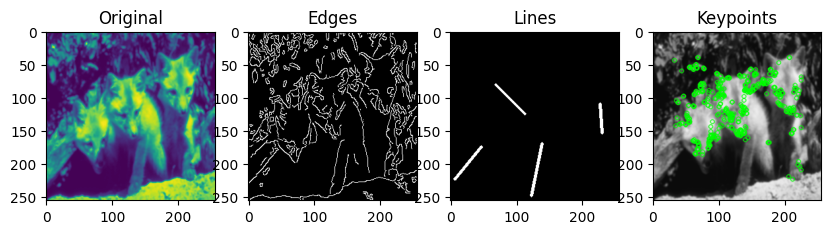

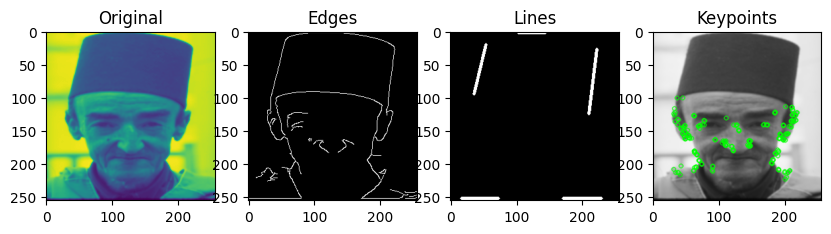

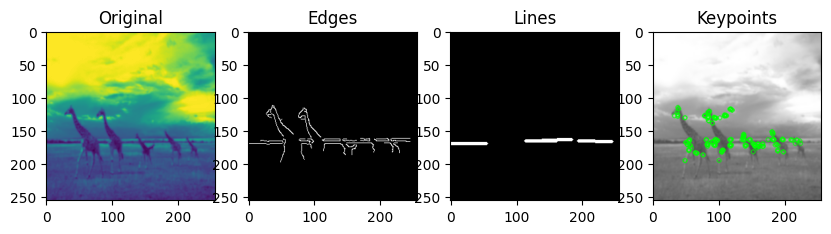

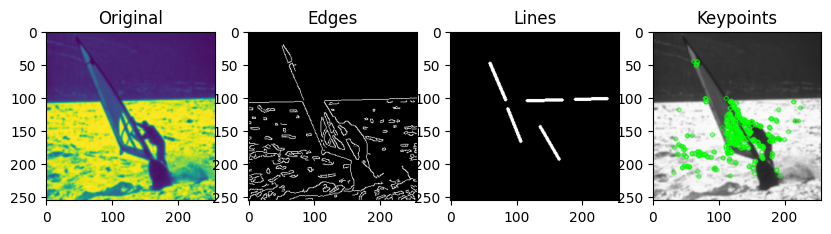

In [25]:
image_paths = ["/content/drive/MyDrive/research_dataset/BSD100/159008.png",
               "/content/drive/MyDrive/research_dataset/BSD100/189080.png",
               "/content/drive/MyDrive/research_dataset/BSD100/253055.png",
               "/content/drive/MyDrive/research_dataset/BSD100/62096.png"]
for path in image_paths:
    img = preprocess_image(path)
    edges = extract_edges(img)
    lines = extract_lines(edges)
    keypoints = extract_keypoints(img)

    plt.figure(figsize=(10, 8))

    plt.subplot(141), plt.imshow(img), plt.title('Original')
    plt.subplot(142), plt.imshow(edges, cmap='gray'), plt.title('Edges')
    plt.subplot(143), plt.imshow(lines, cmap='gray'), plt.title('Lines')
    plt.subplot(144), plt.imshow(keypoints), plt.title('Keypoints')
    plt.show()